## Ridge regression

In [1]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#### Declare some visual functions

In [2]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()

#### Select feature

##### Read data

- Training set

In [3]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Width,Length,Area,Floors,Rooms,Toilets,Price,1 Part Residential,...,House Direction_NORTHEAST,House Direction_NORTHWEST,House Direction_SOUTH,House Direction_SOUTHEAST,House Direction_SOUTHWEST,House Direction_WEST,Furnishing Sell_BASIC_FINISHING,Furnishing Sell_FULLY_FURNISHED,Furnishing Sell_HIGH_END_FURNITURE,Furnishing Sell_RAW_HANDOVER
0,10.399917,4.006730,2.236068,1.117928,10.099505,0.0,0.0,0.0,-1.944261,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,10.400602,4.003590,2.236068,0.291615,10.000000,0.0,0.0,0.0,-1.906382,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10.398891,4.009621,2.236068,0.291615,10.000000,0.0,0.0,0.0,-1.906382,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10.399521,4.008289,2.236068,-1.085572,8.660254,0.0,0.0,0.0,-1.893012,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,10.397751,4.005646,2.236068,0.291615,10.000000,0.0,0.0,0.0,-1.794971,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


##### Input variables

- Training set

In [4]:
x = df.drop(columns=["Price"])
x.head()

,Longitude,Latitude,Width,Length,Area,Floors,Rooms,Toilets,1 Part Residential,All Residential,...,House Direction_NORTHEAST,House Direction_NORTHWEST,House Direction_SOUTH,House Direction_SOUTHEAST,House Direction_SOUTHWEST,House Direction_WEST,Furnishing Sell_BASIC_FINISHING,Furnishing Sell_FULLY_FURNISHED,Furnishing Sell_HIGH_END_FURNITURE,Furnishing Sell_RAW_HANDOVER
0,10.399917,4.006730,2.236068,1.117928,10.099505,0.0,0.0,0.0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,10.400602,4.003590,2.236068,0.291615,10.000000,0.0,0.0,0.0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10.398891,4.009621,2.236068,0.291615,10.000000,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10.399521,4.008289,2.236068,-1.085572,8.660254,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,10.397751,4.005646,2.236068,0.291615,10.000000,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


##### Target variables

- Training set

In [5]:
y = df[['Price']]
y.head()

,Price
0,-1.944261
1,-1.906382
2,-1.906382
3,-1.893012
4,-1.794971


##### Divide into 2 training sets and validation sets

 - Split data

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=554)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(11151, 32) (2788, 32)
(11151, 1) (2788, 1)


#### Select Alpha coefficient

In [7]:
alpha_range = np.arange(0.05, 1, 0.05)
models = {}

def _regression(alpha, X_train, y_train, X_validation, y_validation, models: dict):
    dict_models = {}
    rid_regr = Ridge(alpha=alpha)
    rid_regr.fit(X_train, y_train)
    y_pred = rid_regr.predict(X_validation)
    MSE = np.mean((y_validation-y_pred)**2)
    dict_models["MSE"] = MSE
    dict_models["model"] = rid_regr
    model_name = "ridge_" + str(alpha)
    models[model_name] = dict_models
    return models

for alpha in alpha_range:
  models = _regression(round(alpha, 2), X_train, y_train, X_validation, y_validation, models)

# Print out the model with the best alpha coefficient (smallest MSE)
i = 0
for k, v in models.items():
  if i==0:
    best_model = k
    mse = models[k]["MSE"]
  if models[k]["MSE"] < mse:
    best_model = k
  print("model {}, MSE: {}".format(k, models[k]["MSE"]))
  i+=1

print("-----------------------------------------")
print("Best models: {}, MSE: {}".format(best_model, models[best_model]["MSE"]))


model ridge_0.05, MSE: 0.562047896306758
model ridge_0.1, MSE: 0.5952441729494081
model ridge_0.15, MSE: 0.612966201971454
model ridge_0.2, MSE: 0.6241514805034314
model ridge_0.25, MSE: 0.6319629863584597
model ridge_0.3, MSE: 0.6377844154136381
model ridge_0.35, MSE: 0.6423205878365325
model ridge_0.4, MSE: 0.6459714457408342
model ridge_0.45, MSE: 0.6489826557724924
model ridge_0.5, MSE: 0.6515144770086692
model ridge_0.55, MSE: 0.653676478404732
model ridge_0.6, MSE: 0.6555464360026156
model ridge_0.65, MSE: 0.6571812736157582
model ridge_0.7, MSE: 0.6586237254079348
model ridge_0.75, MSE: 0.6599065674929809
model ridge_0.8, MSE: 0.6610554025860065
model ridge_0.85, MSE: 0.6620905487954913
model ridge_0.9, MSE: 0.6630283546593527
model ridge_0.95, MSE: 0.6638821357697746
-----------------------------------------
Best models: ridge_0.05, MSE: 0.562047896306758


*Vậy với Alpha 0.05 sẽ cho mô hình tối ưu nhất*

#### Model training

##### 4.1 Create a Ridge Regression model object from the linear_model library and train it with input and target variables

In [8]:
ridge_regression = Ridge(alpha=0.05)
ridge_regression.fit(X_train, y_train)


Ridge(alpha=0.05)

##### Real estate price prediction

- Prediction on validation set

In [9]:
y_pred_validation = ridge_regression.predict(X_validation)
y_pred_validation

array([[-0.10091301],
       [ 0.08852721],
       [-0.46214953],
       ...,
       [-0.49340845],
       [-0.80521027],
       [-0.34192814]])

- On the train set

In [10]:
y_pred_train = ridge_regression.predict(X_train)
y_pred_train

array([[-0.50975005],
       [-0.04514727],
       [-0.67625802],
       ...,
       [-0.29386719],
       [-0.01524393],
       [ 1.50471578]])

##### Model evaluation based on MSE and R-squared

- Review on Train

In [11]:
# Calculate MSE
mse_ridge_train = mean_squared_error(y_train, y_pred_train)

# Calculate R-squared
r2_ridge_train = r2_score(y_train, y_pred_train)

# Calculate MAPE
n = len(y_train)
mape = (1/n) * np.sum((np.abs((y_pred_train - y_train) / y)) * 100, axis=0)

print("Train Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge_train)
print("R-squared of Ridge Model:", r2_ridge_train * 100)
print("MAPE of Ridge Model:", mape)

Train Set:
Mean Squared Error (MSE) of Ridge Model: 0.571396293216022
R-squared of Ridge Model: 42.95939684738356
MAPE of Ridge Model: Price    183.687744
dtype: float64


- Evaluation on the Validation set

In [12]:
# Calculate MSE
mse_ridge = mean_squared_error(y_validation, y_pred_validation)

# Calculate R-squared
r2_ridge = r2_score(y_validation, y_pred_validation)

# Calculate MAPE
n = len(y_validation)
mape = (1/n) * np.sum((np.abs((y_pred_validation - y_validation) / y)) * 100, axis=0)

print("Validation Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge)
print("R-squared of Ridge Model:", r2_ridge * 100)
print("MAPE of Ridge Model:", mape)

Validation Set:
Mean Squared Error (MSE) of Ridge Model: 0.562047896306758
R-squared of Ridge Model: 43.37639921191195
MAPE of Ridge Model: Price    175.993572
dtype: float64


#### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

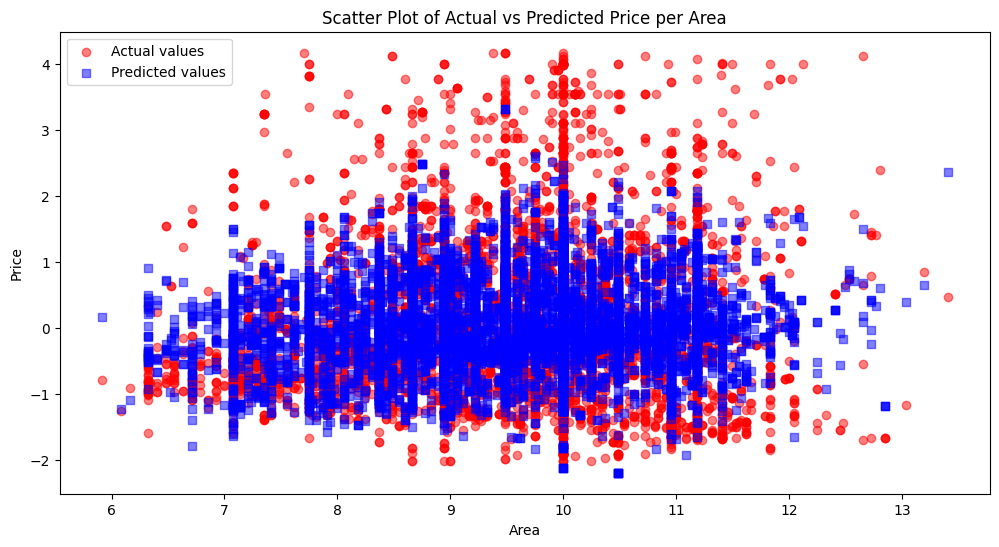

In [13]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area", "Area", "Price")

- Validation set 

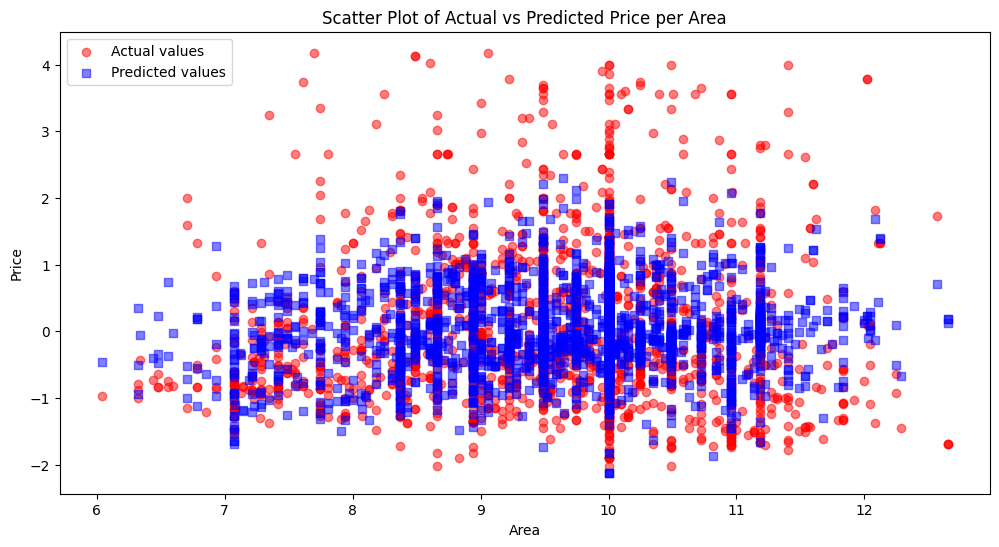

In [14]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area", "Area", "Price")

#### Conclusion

##### Advantages
<li>Provides a more stable solution than conventional Linear Regression by minimizing the magnitude of the coefficients, which improves accuracy and reduces the risk of overfitting</li>
<li>Maintains flexibility so that the model can adapt to new data</li>

##### Disadvantages
<li>More complex than Linear Regression</li>
<li>Not stable because changing random_state values ​​can cause model performance fluctuations</li>